In [1]:
import numpy as np
from scipy import linalg as la
from numpy import lib as lb
from matplotlib import pyplot as plt

In [2]:
def problem_1(A, k=None):
    m,n=A.shape
    eigs, vecs = la.eig(np.dot(A.conj().T,A))
    order = np.argsort(-eigs)
    if k!=None and k<eigs.size:
        sort = (eigs[order])[:k]
        V = (vecs[order])[:,:k]
    else:
        sort = eigs[order]
        V = vecs[order]
    sigma = lb.scimath.sqrt(sort)
    U = np.empty([m,sigma.size],dtype=np.complex64)
    for i in range(sigma.size):
        U[:,i] = (1/sigma[i])*np.dot(A,V[:,i])
    return U, sigma, V

In [3]:
A = np.random.random((9,6))
U,sigma,V = problem_1(A)
sigma = np.diag(sigma)
print(A.shape, U.shape, V.shape)
print(np.allclose(np.dot(np.dot(U,sigma),V.conj().T),A))

A = np.random.random((8,7))
U,sigma,V = problem_1(A,3)
sigma = np.diag(sigma)
print(A.shape, U.shape, V.shape)

(9, 6) (9, 6) (6, 6)
True
(8, 7) (8, 3) (7, 3)


/Users/rubyzhang/anaconda/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


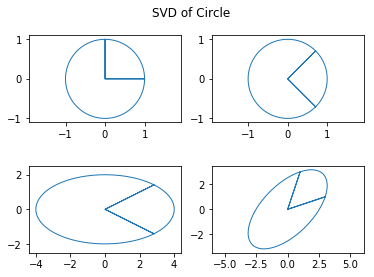

In [4]:
#Problem 2 
A = np.array([[3,1],[1,3]])
U,sigma,V = problem_1(A)
sigma = np.diag(sigma)

theta = np.linspace(0, 2*np.pi, 200)
x = np.cos(theta)
y = np.sin(theta)
C = np.column_stack((x,y))
C = np.append(C,[[0,0],[0,1],[0,0],[1,0]],axis=0)
#print(C)

fig, axes = plt.subplots(nrows=2, ncols=2)
plt.subplot(221)
plt.plot(C[:,0],C[:,1],'-', lw=1)
plt.axis("equal")

V_H = V.conj().T
C = np.dot(V_H,C.T)
plt.subplot(222)
plt.plot(C[0,:],C[1,:],'-', lw=1)
plt.axis("equal")

C = np.dot(sigma,C)
plt.subplot(223)
plt.plot(C[0,:],C[1,:], '-', lw=1)
plt.axis("equal")

C = np.dot(U,C)
plt.subplot(224)
plt.plot(C[0,:],C[1,:], '-', lw=1)
plt.axis("equal")

fig.subplots_adjust(hspace=.5)
plt.suptitle('SVD of Circle')
plt.show()

In [5]:
# Problem 3
def svd_approx(A,k):
    U,s,Vh = la.svd(A, full_matrices=False)
    if k>0 and k<s.size:
        S = np.diag(s[:k])
        U = U[:,:k]
        Vh = Vh[:k,:]
    else:
        S = np.diag(s)
    Ahat = U.dot(S).dot(Vh)
    return Ahat

In [6]:
A = np.random.random((9,6))
Ahat = svd_approx(A,4)
print(la.norm(A-Ahat))

0.551890514291


In [7]:
# Problem 4
def lowest_rank_approx(A,e):
    U,s,Vh = la.svd(A, full_matrices=False)
    discard = np.where(s<e)
    if discard[0].size==0:
        index = s.size
    else:
        index = discard[0][0]
    return index

In [8]:
A = np.random.random((14,20))
rank = lowest_rank_approx(A,0.6)
print(rank)

12


In [9]:
# Problem 5
def compress_img(filename,k):
    X_R = plt.imread(filename)[:,:,0].astype(float)/255
    X_G = plt.imread(filename)[:,:,1].astype(float)/255
    X_B = plt.imread(filename)[:,:,2].astype(float)/255

    X = np.dstack([X_R,X_G,X_B])
    plt.title('Original Image')
    plt.imshow(X)
    
    plt.show()
    
    X_r = svd_approx(X_R,k)
    X_g = svd_approx(X_G,k)
    X_b = svd_approx(X_B,k)
    
    X_r[X_r>1] = 1
    X_r[X_r<0] = 0
    X_g[X_g>1] = 1
    X_g[X_g<0] = 0
    X_b[X_b>1] = 1
    X_b[X_b<0] = 0
    
    X_com = np.dstack([X_r,X_g,X_b])
    plt.title('Compressed Image')
    plt.imshow(X_com)
    
    plt.show()

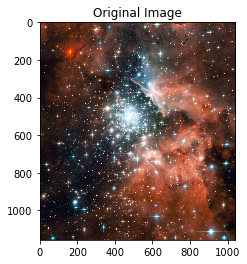

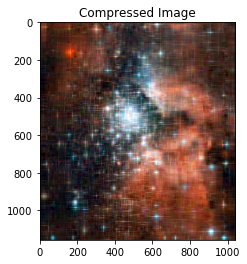

In [10]:
compress_img('/Users/rubyzhang/Desktop/UChicago/OSML/BootCamp2017/Computation/Wk3_Decomp/hubble.jpg',20)